The Spark Foundation - Data Science and  Business Analytics Internship





Task 3- Exploratory Data Analysis - Retail

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Reading the dataset

In [ ]:
data=pd.read_csv("/content/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Data Processing

In [ ]:
data.shape

(9994, 13)

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#checking of duplication values
data.duplicated().sum()

17

In [ ]:
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#removing the unncessary columns such as portal code
data= data.drop(['Postal Code'],axis=1)

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


EXPLORATORY DATA ANALYSIS

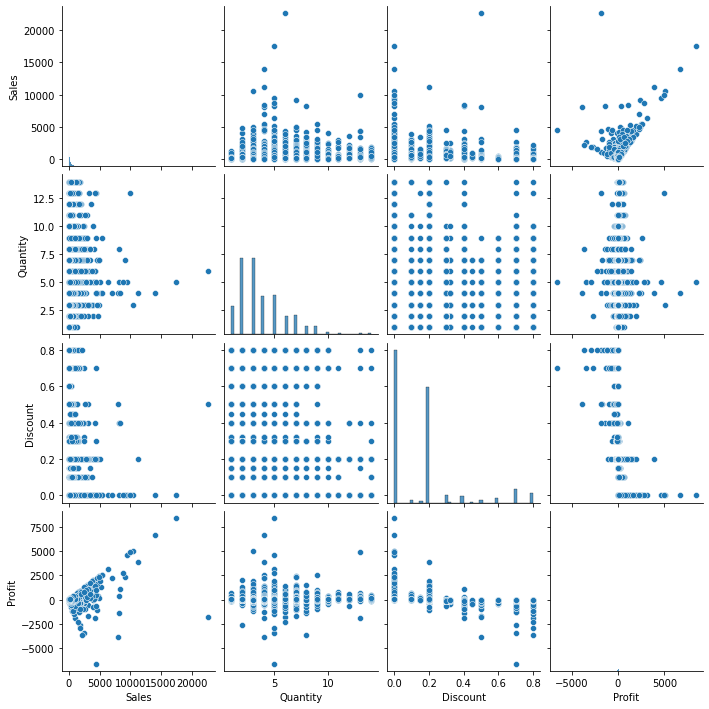

In [ ]:
#visualizing the dataset as a whole  using the pair plot
import seaborn as sns
sns.pairplot(data)

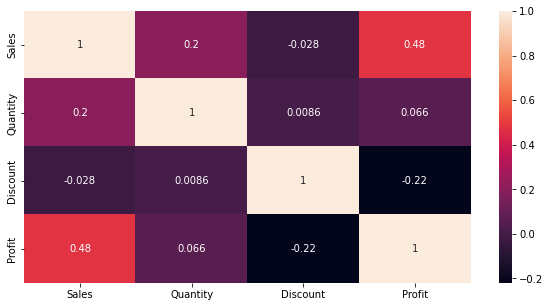

In [ ]:
data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()


visualising the categories

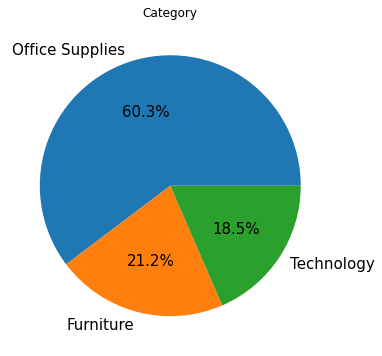

In [ ]:
plt.figure(figsize=(6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x1152 with 0 Axes>

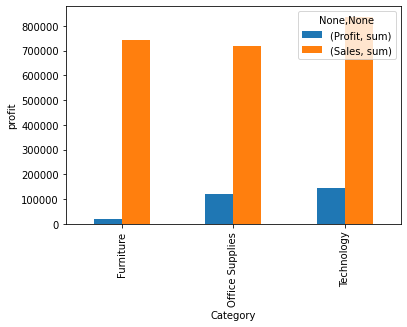

In [ ]:
plt.figure(figsize=(10,16))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('profit')
plt.show()

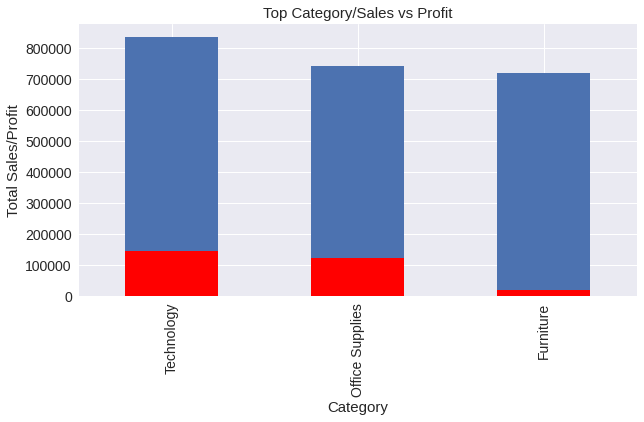

In [ ]:
#computing top categories in terms of scales from first 100 observations
top_category_s = data.groupby("Category").Sales.sum().nlargest(n=100)
#computing top categories in terms of profit from first 100 observation
top_category_p=data.groupby("Category").Profit.sum().nlargest(n=100)

#plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize=(10,5),fontsize=14)
top_category_p.plot(kind='bar',figsize=(10,5),fontsize=14,color='red')
plt.xlabel('Category',fontsize=15)
plt.ylabel('Total Sales/Profit',fontsize=15)
plt.title("Top Category/Sales vs Profit",fontsize =15)
plt.show()

visualising the sub categories

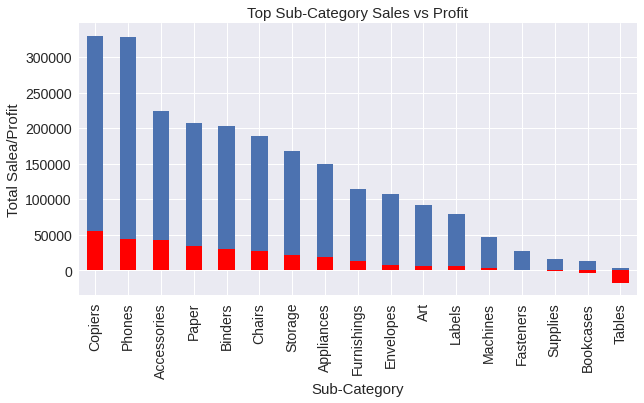

In [ ]:
#computing top sub categories in terms of scales from first 10 observation
top_subcategory_s=data.groupby("Sub-Category").Sales.sum().nlargest(n=100)
#computing top sub-categories in term of profit from first  100 onservation
top_subcategory_p=data.groupby("Sub-Category").Profit.sum().nlargest(n=100)

#ploting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_subcategory_p.plot(kind= 'bar', figsize=(10,5),fontsize =14,color ='red')
plt.xlabel('Sub-Category', fontsize= 15)
plt.ylabel('Total Salea/Profit',fontsize=15)
plt.title("Top Sub-Category Sales vs Profit",fontsize =15)
plt.show()


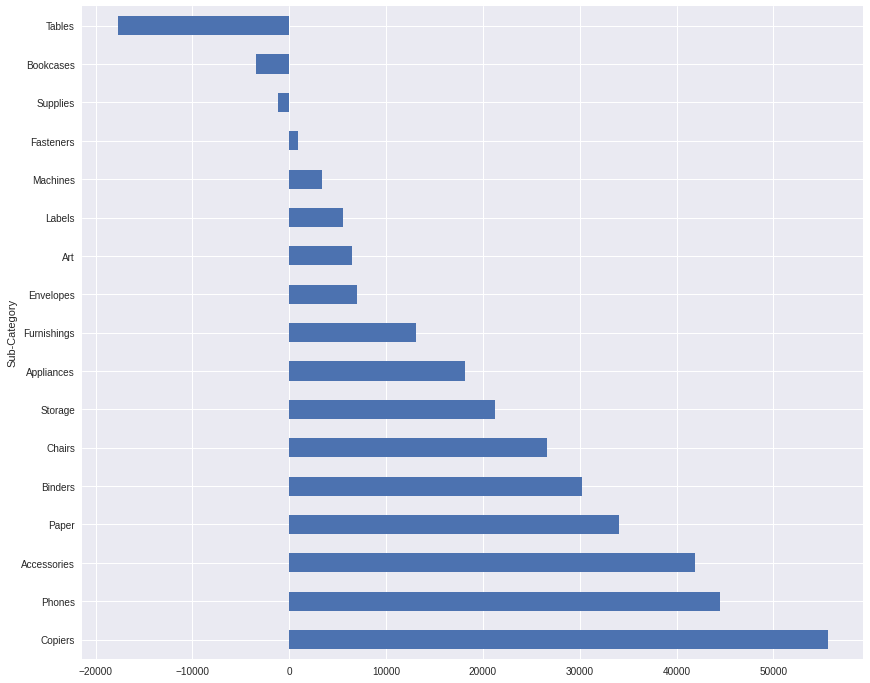

In [ ]:
plt.figure(figsize=(14,12))
statewise=data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


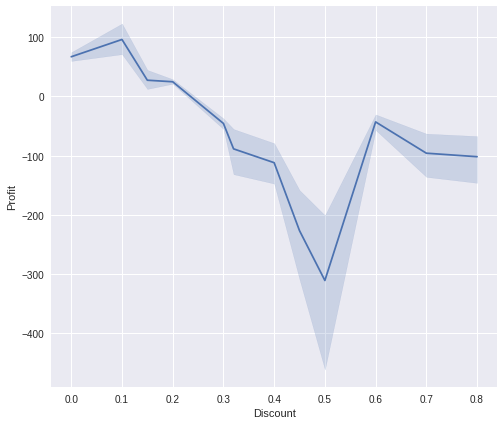

In [ ]:
plt.figure(figsize =(8,7))
sns.lineplot(data['Discount'],data['Profit'],data=data)

visualizing the sales vs Profit in different Regions

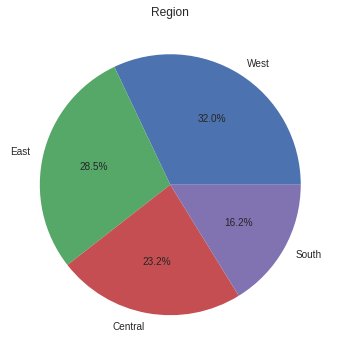

In [ ]:
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(data['Region'].value_counts(),labels=data['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

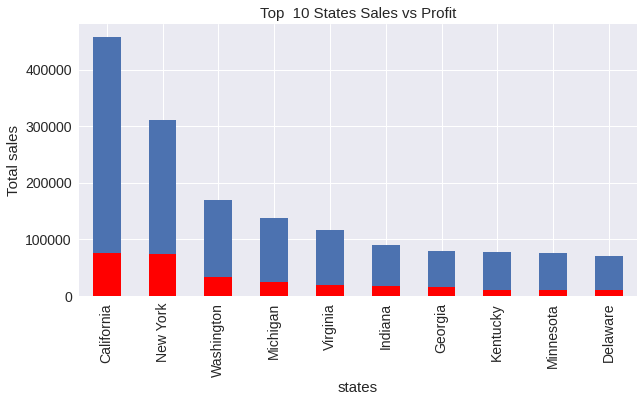

In [ ]:
#computing top states in terms of scales from first 10 observation
top_states_s = data.groupby("State").Sales.sum().nlargest(n=10)

#computing top states in terms of profit from first 10 observation
top_states_p= data.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_states_s.plot(kind='bar',figsize=(10,5),fontsize =14)
top_states_p.plot(kind = 'bar', figsize =(10,5), fontsize=14,color='red')
plt.xlabel('states',fontsize =15)
plt.ylabel('Total sales',fontsize =15)
plt.title("Top  10 States Sales vs Profit",fontsize=15)
plt.show()

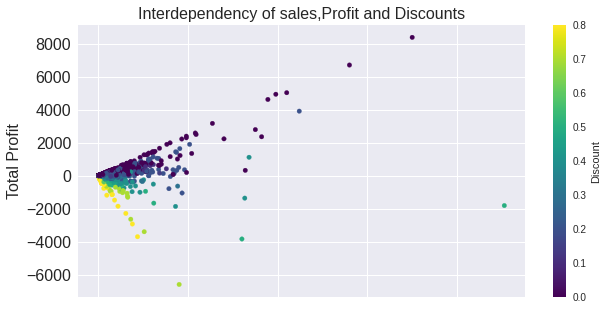

In [ ]:
plt.style.use('seaborn')
data.plot(kind = "scatter",figsize = (10,5),x="Sales",y="Profit",c="Discount",s=20, fontsize=16,colormap = "viridis")
plt.ylabel('Total Profit',fontsize=16)
plt.title("Interdependency of sales,Profit and Discounts",fontsize = 16)
plt.show()
